### Homework 7
### Mouselinos Spyridon
### February 2020
***

In [1]:
### Imports

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from scipy.spatial import distance
from math import pi

### Exersize 3
***

In [3]:
### Let's plot the three distributions
### Assuming that the classes are equiprobable we have that
### P(ω1) = P(ω2) = P(ω3) = 1/3
### P(ω1)P(χ|ω1) = 1/15
### P(ω2)P(χ|ω2) = 1/27
### P(ω3)P(χ|ω3) = 1/3

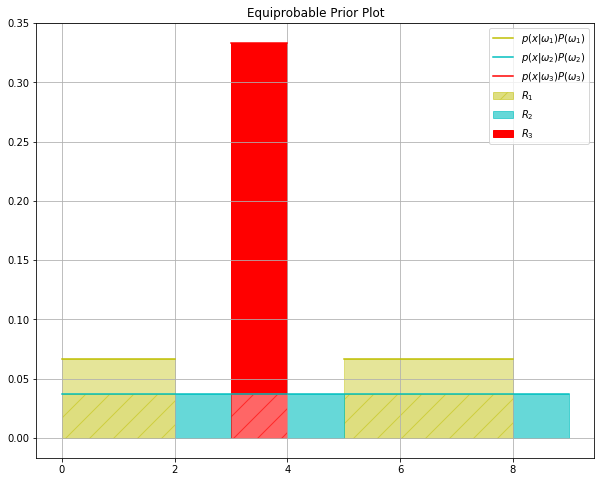

In [4]:
plt.figure(figsize=(10,8))
plt.title("Equiprobable Prior Plot")
plt.grid()
### P(ω1)
plt.plot([0,1,2], [(1/15)]*3,'y',label='$p(x|\omega_1)P(\omega_1)$')
plt.plot([5,6,7,8],[(1/15)]*4,'y')
plt.fill_between([0,1,2], 0, (1/27), color='y', alpha=0.5, label='$R_1$', hatch='/', edgecolor="c")
plt.fill_between([0,1,2], (1/27), (1/15), color='y', alpha=0.4)
plt.fill_between([5,6,7,8], 0, (1/27), color='y', alpha=0.5, hatch='/', edgecolor="c")
plt.fill_between([5,6,7,8], (1/27), (1/15), color='y', alpha=0.4)

### P(ω2)
plt.plot([0,1,2,3,4,5,6,7,8,9],[(1/27)]*10,'c',label='$p(x|\omega_2)P(\omega_2)$')
plt.fill_between([2,3], 0, (1/27), color='c', alpha=0.6,label='$R_2$')
plt.fill_between([4,5], 0, (1/27), color='c', alpha=0.6)
plt.fill_between([8,9], 0, (1/27), color='c', alpha=0.6)

### P(ω3)
plt.plot([3,4],[(1/3)]*2,'r',label='$p(x|\omega_3)P(\omega_3)$')
plt.fill_between([3,4], 0, (1/27), color='r', hatch='/',edgecolor="c",alpha=0.6)
plt.fill_between([3,4], (1/27), 1/3, color='r',label='$R_3$')

plt.legend(loc=1)
plt.show()

### Exersize 4
***

In [5]:
training_set = sio.loadmat('Training_set.mat')
train_x = training_set['train_x']
train_y= training_set['train_y']

test_set = sio.loadmat('Test_set.mat')
test_x = test_set['test_x']
test_y = test_set['test_y']

In [6]:
### Bayes Classifier

### In order to adopt such solution we need to calculate:
### 1) The prior probabilities of the Classes in the Train Set

### And estimate:
### 2) The pdf's the p(x|class_id) of each class.

In [7]:
### Total Training Samples
total_n = len(train_y)

In [8]:
### Let's estimate the priors as the number of 
### assigned points in each class divided by the total number of ponts
idx_1 = (train_y==1).reshape(total_n)
idx_2 = (train_y==2).reshape(total_n)
idx_3 = (train_y==3).reshape(total_n)

Prior_class_1 = np.count_nonzero(idx_1) / total_n
Prior_class_2 = np.count_nonzero(idx_2) / total_n
Prior_class_3 = np.count_nonzero(idx_3) / total_n


print("The Prior of Class 1 is: {}".format(Prior_class_1))
print("The Prior of Class 2 is: {}".format(Prior_class_2))
print("The Prior of Class 3 is: {}".format(Prior_class_3))

The Prior of Class 1 is: 0.5
The Prior of Class 2 is: 0.25
The Prior of Class 3 is: 0.25


In [9]:
### In order to estimate the p(x|class_id) of each class, we need to have
### an idea of how the classes are distributed. Because the data are 4-D,
### we will plot all the possible feature combinations.

In [10]:
def perform_3d_ploting(dataset, dimension_set=0):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    
    ax.scatter(train_x[idx_1,dimension_set],train_x[idx_1,dimension_set+1],train_x[idx_1,dimension_set+2], c='c', label='class 1')
    ax.scatter(train_x[idx_2,dimension_set],train_x[idx_2,dimension_set+1],train_x[idx_2,dimension_set+2], c='r', label='class 2')
    ax.scatter(train_x[idx_3,dimension_set],train_x[idx_3,dimension_set+1],train_x[idx_3,dimension_set+2], c='y', label='class 3')
    plt.legend(loc=3)
    plt.show()
    return

In [11]:
### Let's plot the first 3 dimensions

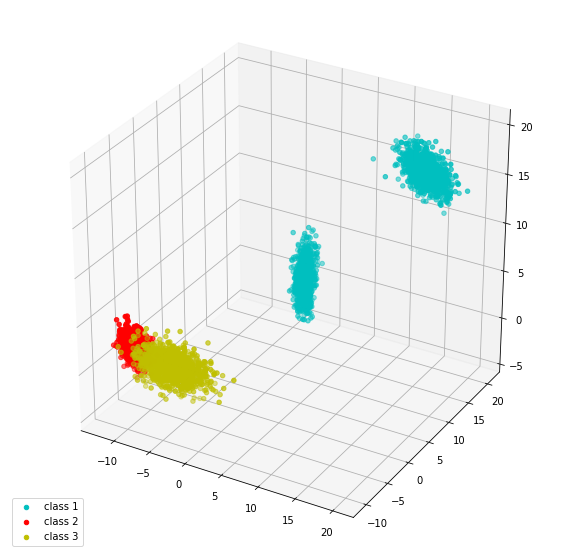

In [12]:
perform_3d_ploting(train_x, dimension_set=0)

In [13]:
### Let's plot the 2nd 3rd and 4th dimensions

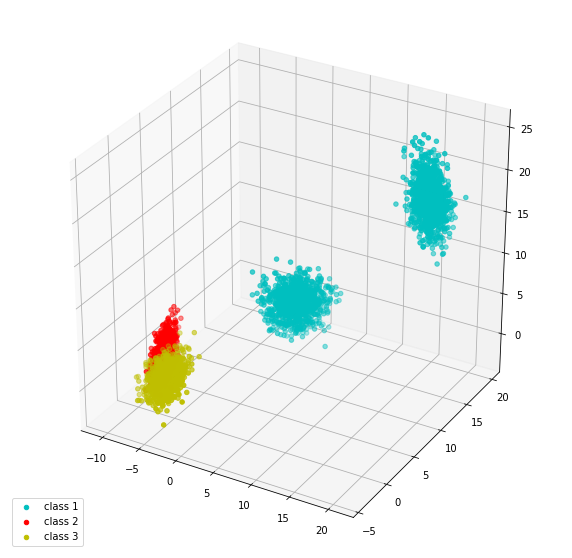

In [14]:
perform_3d_ploting(train_x, dimension_set=1)

In [15]:
### We can see that the data of class 1 come from 2 clusters, 
### the data from class 2 and class 3 from 1 cluster each.

In [16]:
### For the parametric approach we will use the Gaussian Mixture Model for each class.
### We will adopt a 2 component Gaussian for Class 1
### We will adopt a single component Gaussian for Class 2 and Class 3

In [17]:
class_1_estimator = GaussianMixture(n_components=2, covariance_type='full')
class_1_estimator.fit(train_x[idx_1,:])
class_1_scores = np.exp(class_1_estimator.score_samples(test_x))*Prior_class_1

In [18]:
class_1_scores

array([1.59870033e-003, 2.75269495e-004, 2.58868986e-003, ...,
       8.70633401e-287, 1.08040299e-318, 5.50246839e-318])

In [19]:
class_2_estimator = GaussianMixture(n_components=1, covariance_type='full')
class_2_estimator.fit(train_x[idx_2,:])
class_2_scores = np.exp(class_2_estimator.score_samples(test_x))*Prior_class_2

In [20]:
class_2_scores

array([9.97419402e-274, 0.00000000e+000, 4.82736019e-316, ...,
       2.60890825e-002, 2.27474179e-003, 1.91773555e-002])

In [21]:
class_3_estimator = GaussianMixture(n_components=1, covariance_type='full')
class_3_estimator.fit(train_x[idx_3,:])
class_3_scores = np.exp(class_3_estimator.score_samples(test_x))*Prior_class_3

In [22]:
class_3_scores

array([8.52576571e-043, 2.78614540e-183, 2.00051525e-050, ...,
       2.93100819e-004, 2.66846070e-007, 3.05851305e-005])

In [23]:
### Let's aggregate the per-point class score into a single matrix

In [24]:
total_scores = np.array([class_1_scores,class_2_scores,class_3_scores]).T

In [25]:
### Now let's test with respect to the 'real' class

In [26]:
parametric_method_results = np.argmax(total_scores,axis=1).reshape(len(total_scores),1) + 1

In [27]:
parametric_method_error  = 1 - (np.sum(i==1 for i in parametric_method_results == test_y)) / len(parametric_method_results)

/home/spyros/Environments/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


In [28]:
print("The parametric method error is: {}".format(round(parametric_method_error[0],5)))

The parametric method error is: 0.012


In [29]:
### The confusion Matrix

In [30]:
confusion_matrix(test_y.reshape(-1), parametric_method_results.reshape(-1))

array([[2000,    0,    0],
       [   0,  986,   14],
       [   0,   34,  966]])

In [31]:
### For the non- parametric approach we will use kNN density estimation

In [32]:
### First we need to estimate pairwise distances betweeen test and training samples
pairwise_dist = distance.cdist(test_x,train_x,'euclidean')

In [33]:
### Next we need to define the 4d-hypersphere volume to include the neighbours
def hyper4dvolume(distance):
    return 0.5*(pi**2)*(distance**4)

In [34]:
### We will choose the number of neighbours arbitrarily @ 8
k=8

N1 = Prior_class_1 * total_n
N2 = Prior_class_2 * total_n
N3 = Prior_class_3 * total_n

In [35]:
class_1_scores = k/(N1*hyper4dvolume(np.sort(pairwise_dist[:,idx_1])[:,4]))*Prior_class_1
class_2_scores = k/(N2*hyper4dvolume(np.sort(pairwise_dist[:,idx_2])[:,4]))*Prior_class_2
class_3_scores = k/(N3*hyper4dvolume(np.sort(pairwise_dist[:,idx_3])[:,4]))*Prior_class_3


total_scores = np.array([class_1_scores,class_2_scores,class_3_scores]).T
non_parametric_results = np.argmax(total_scores,axis=1).reshape(len(total_scores),1) + 1
non_parametric_error = 1 - (np.sum(i==1 for i in non_parametric_results == test_y)) / len(non_parametric_results)

/home/spyros/Environments/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [36]:
print("The Non-parametric method error is: {}".format(round(non_parametric_error[0],5)))

The Non-parametric method error is: 0.0165


In [37]:
### The confusion Matrix

In [38]:
confusion_matrix(test_y.reshape(-1), non_parametric_results.reshape(-1))

array([[2000,    0,    0],
       [   0,  991,    9],
       [   0,   57,  943]])